In [1]:
import os.path
import time
import pylab as pl
import numpy as np
from scipy import rand
from scipy.io import loadmat
%pylab inline
import os
import time
from scipy.io import savemat, loadmat
from numpy import *
import copy
import pandas as pd
from scipy.io import loadmat
import seaborn as sns
import scipy
from scipy.signal import savgol_filter
from scipy.signal import argrelextrema
from scipy.signal import find_peaks_cwt
from scipy.signal import find_peaks
from scipy import interpolate
import math
def truncate(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper
sns.set()

Populating the interactive namespace from numpy and matplotlib


In [2]:
d = '3D_1um'
# d = '3D_1.5um'
##########################################
dx = 0.11029266566038132
frame = 50
# projection = 'densities'
# projection = 'minProjection' #min diffusivity projection
projection = 'diffusivity' #average diffusivity projection
##########################################
dtDict = {'wt_gems_1.5stack003': 0.44573554396629333, 
          'wt-gems_1frame_1umstack007': 0.3540413975715637, 
          'wt-gems_1frame_1umstack005': 0.3520873188972473, 
          '1.5stack_003': 0.5459893345832825, 
          '=wt-gems_1frame_1umstack009': 0.3537989556789398}
nest = np.load('axialData-{0}.npy'.format(d),allow_pickle=True,
               encoding='latin1')[0] #b/c file was made w/ python 2
vids = nest.keys()
sorted(vids)

['wt-gems_1frame_1umstack005', 'wt-gems_1frame_1umstack007']

In [3]:
allDiffs = []
allWeights = []

for v in vids: #each video (cell)
    for hy in arange(len(nest[v][projection])): #each hypha in the cell
        tipLoc = []
        idxTip = []
        if len(nest[v][projection][hy]) == 1:
            continue
        diffsZeros = nest[v][projection][hy][frame,:]*dx**2/dtDict[v] #diffusivity,
                                                                                  #um^2/s
        diffs = array([i for i in diffsZeros if i!=0]) #diffusivity values w/0 0's 
        AL = abs(nest[v]['arcLength'][hy])*dx #Arc length, um
        if len(diffsZeros) == 0: #if empty, skip
            continue
        if len(nest[v]['arcLength'][hy]) < 10: #skip very short medial axis semgentes
            continue
        ##############################################################
        ### getting weights based on distances b/w medial axis points:
        diffAL = np.diff(AL) #distance b/w medial axis points
        weights = np.zeros(len(AL))
        weights[0] = diffAL[0] #beginning and end points are weighted by neighboring 
        weights[-1] = diffAL[-1]                                           #distance
        for i, val in enumerate(weights[1:-1],1): #middle points weighted by average of
            weights[i] = (diffAL[i-1] + diffAL[i])/2   #their two neighboring distances
        ###############################################################################
        allDiffs = append(allDiffs,diffs) #all diffusivity values from all cells
        allWeights = append(allWeights,weights)

mean:
0.08506521111776476
n:
3082
std:
0.058113169946178586


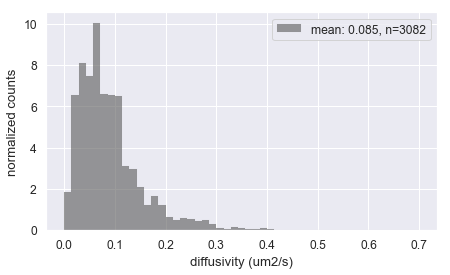

In [8]:
fig = plt.figure(1,figsize=(7,4))
sns.set(font_scale=1.1)

# plt.hist(allDiffs,color='deepskyblue',bins=linspace(0,0.1,50),lw=0.4,alpha=.8,
#          weights=allWeights,density=True,histtype='stepfilled', linewidth=0.05,
#          edgecolor='deepskyblue',label='Diffusivity values\nfrom all hyphae')
######
plt.hist(allDiffs,color=[0.35,0.35,0.35],bins=linspace(0,0.7,50),lw=0.4,alpha=.6,
         weights=allWeights,density=True,histtype='stepfilled', linewidth=0.05,
         edgecolor=[0.55,0.55,0.55],label='mean: 0.085, n=3082')
######
plt.legend()
xlabel('diffusivity (um2/s)')
ylabel('normalized counts')
###
print('mean:')
print(np.mean(allDiffs))
print('n:')
print(len(allDiffs))
print('std:')
print(std(allDiffs))